In [ ]:
# 우리가 확보한 데이터는 일부밖에 안됨.
# 그래서 수많은 문제점이 생길 수 있음.
# 이걸 어떻게 전처리해서 실제 분포에 맞춰 가는 것이 실제 기계학습의 핵심
# 그래서 80% 전처리 하는데 시간을 보내는 것.
# general 한 알고리즘을 쓰지만, 문제상황은 specific 하다 => 최적의 모델을 만들고 선택하는 것이 기계학습의 목적

In [ ]:
# 데이터를 쪼개는 게 기본
# 그런데 데이터가 작으면 cross validation 이 기본
# 쪼개고 나서, 모델에 맞는 전처리가 따로 있음 => 항상 규칙으로 만들 수 있는게 아님. 따라서 상황에 따라 달라짐

In [ ]:
# 대표적으로 가장 잘되는 것; 거리 기반 알고리즘에서 편차가 크거나 크기가 커버리면, MinMaxScaler, StandardScaler
# 여러 알고리즘을 찾음. 알고리즘 찾을 때, 알고리즘의 하이퍼 파라미터가 중요함.

In [ ]:
# hyper parameter
# KNN 알고리즘은 유유상종.
# 분포를 봄. 나하고 가까운 k 1개, k=3, k=5 즉 옵션에 따라 분류기준이 달라짐.
# 즉, 학습을 통해서 찾는 것이 아니라, 사람이 정해줘야 하는 파라미터를 하이퍼파라미터라고 함.
# 하이퍼 파라미터에 따라서 성능이 바뀜. 그러면 우리는 무엇을?
# 최고의 성능을 가지는 하이퍼 파라미터를 찾아야 함 => 이것을 hyper parameter 튜닝

In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Classification, Regression 선택 기준

In [4]:
knn = KNeighborsClassifier()

In [ ]:
# Init signature:
# KNeighborsClassifier(
#     n_neighbors=5,
#     *,
#     weights='uniform',
#     algorithm='auto',
#     leaf_size=30,
#     p=2,
#     metric='minkowski',
#     metric_params=None,
#     n_jobs=None,
# )
# 이 옵션들이 하이퍼 파라미터
# vars() 해서 알 수 있고, get_params()로도 하이퍼 파라미터를 알 수 있음.

In [5]:
vars(knn)

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

In [6]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# 알고리즘 모르는데 하이퍼 파라미터 자동화?
# sklearn 에서 관례상, 함수 설명에서 위에 위치할수록 성능에 가장 큰 영향을 미침.
# Init signature:
# KNeighborsClassifier(
#     n_neighbors=5,
#     *,
#     weights='uniform',
#     algorithm='auto',
#     leaf_size=30,
#     p=2,
#     metric='minkowski',
#     metric_params=None,
#     n_jobs=None,
# )

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
from sklearn.model_selection import train_test_split
# iris 에서는 cross validation 하는 게 좋음 -> 데이터 수가 작기 때문에.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.species)  # hold out
# sklearn 에서 y값에 문자열 들어갈 수 있음. -> vector, 라벨 인코딩, 원핫 인코딩 다 가능.
# 다른 딥러닝에서는 무조건 숫자(원핫 인코딩)

In [ ]:
# x,y 를 쪼개지 않으면 2개(train, test). 넣으면 4개로.
train, test = train_test_split(iris)

In [17]:
knn = KNeighborsClassifier(7)

In [18]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9473684210526315

In [25]:
# 제일 성능 좋은 k 를 찾는 것이 하이퍼 파라미터 튜닝
# for 돌리면 가장 쉽게 찾음
temp = []
for i in range(3, 21, 2):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    temp.append((i, knn.score(X_test, y_test)))

In [26]:
temp
# 쪼개는 것에 따라서 달라짐. iris는 데이터가 작아서 편차가 크기 떄문

[(3, 0.9473684210526315),
 (5, 0.9210526315789473),
 (7, 0.9210526315789473),
 (9, 0.9473684210526315),
 (11, 0.9473684210526315),
 (13, 0.9736842105263158),
 (15, 0.8947368421052632),
 (17, 0.8947368421052632),
 (19, 0.9210526315789473)]

In [ ]:
# 딥러닝 되면서 하이퍼 파라미터 찾기가 힘들어짐.
# 하이퍼 파라미터를 자동으로 찾는 기법들이 많이 있음.
# 우리 목표는 알고리즘을 찾고 하이퍼 파라미터까지 함께 찾는 것이 목표

In [ ]:
# 한번도 보지 못한 데이터에서도 성능이 좋아야 함. 랜덤하게 잘되면 일반적으로 잘된다고 볼 수 있음.
# 모델 성능 찾기, 학습된 데이터를 가지고 성능평가 하는 것을 재치환평가?
# train, test 쪼개는 이유는, 쪼개지 않고 학습한 데이터로 다시 평가를 하면 점수가 잘나옴.
# 객관적인 성능평가를 위해서는 학습하지 않은 데이터를 가지고 평가를 해야함
# 학습한 데이터로 평가하는 경우가 있음 -> 학습이 잘되고 있는지 아닌지 평가하는 것. ; 재치환 평가; 훈련된 데이터로 다시 훈련시켜서 평가
# 본래 데이터 성능보다 더 잘나오면 객관적 성능평가 어려움.
# 이걸 해야 하는 이유는 학습이 잘 되고 있는지 보기 위해서
# 따라서 학습했던 데이터로도 평가해보고, 한번도 안본 데이터로도 평가해야 함.

In [ ]:
# 학습 정도 여부 평가, 실제 성능 평가 => 2개 다 하는 것
# 목적에 따라서 성능이 좋아야 함. 일부 학습 시킨 것을 학습 했기 때문에 예측 잘할 것.
# 한번도 안본 데이터까지 일반화 되어야함.

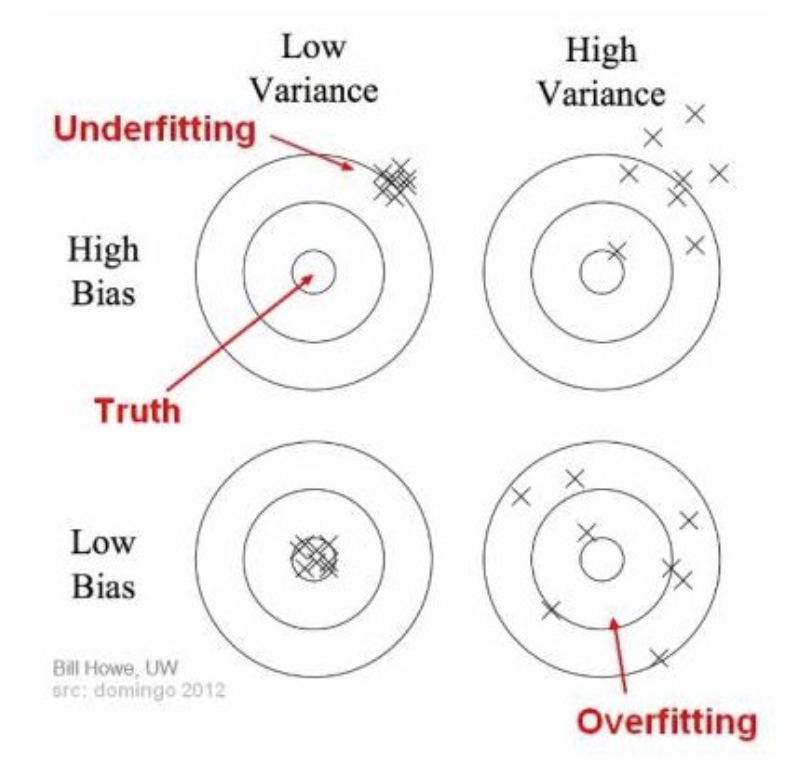

In [ ]:
# bias 와 variance 의 차이에 대해서 보자.
# 머신러닝에서 성능평가와 관련해서 가장 중요한 2가지 개념.
# variance 는 작은데 bias 는 크다 => 중앙에서 멀지만 모여있다.
# variance 작고 bias 작다 => 중앙에서 모여있다
# variance 크고 bias 크다 => 중앙에서 멀고 퍼져 있다.
# variance 크고 bias 작다 => 중앙에 가깝지만 퍼져있다. => 이게 골치아픔
# 이 4번째가 오버피팅 모델. 이것을 조심해야 함.
# bias 가 크면 보통 모델 과정이 잘못된 것. 모델 선택이 잘못된 것; NN 에도 bias가 나옴.
# variance 는 모델과 다름. 데이터셋에 문제가 있는 것.

In [ ]:
# 내가 학습한 데이터로 평가하는 것을 training accuracy
# 한번도 보지 못한 데이터로 평가하는 것이 varlidation or test accuracy
# learning curve; 2가지
# 10개로 학습시키고 10개로 테스트 하면 다 맞춤
# test accuracy 는 데이터가 많을 수록 평평하게 수렴함.

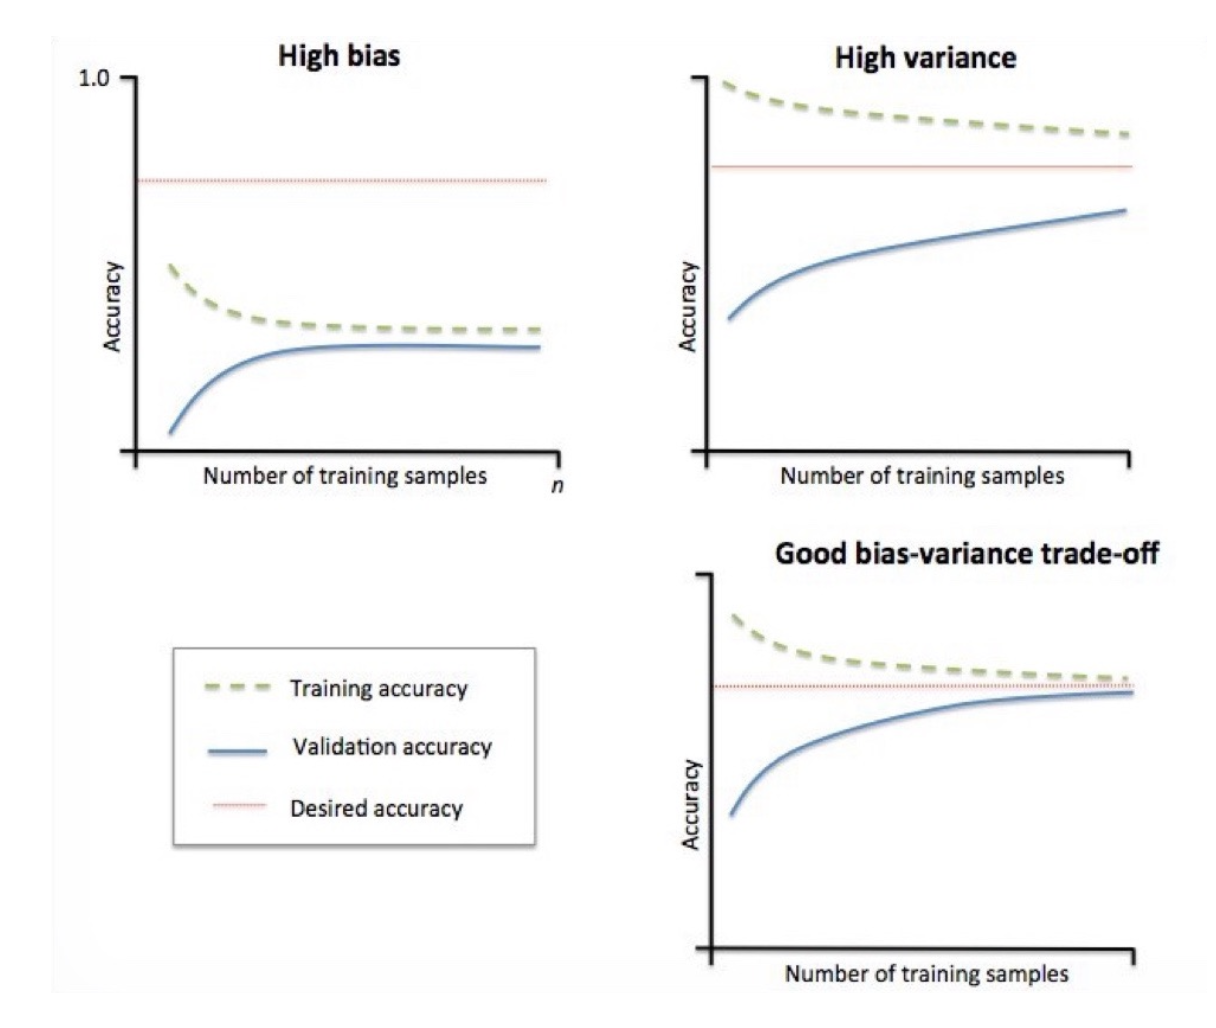

In [ ]:
# 모델을 잘못 선택하면 training 은 떨어지고 test의 정확도는 일반화가 되면서 평평해짐
# 편차가 큰 것을 오버피팅이라고 함
# 최고의 모델은 3번째
# 학습데이터로 성능이 어떻게 변하는가도 그려봐야 함.
# 위와 같은 그래프를 learning curve
# 모델이 복잡하면 복잡할수록 데이터가 많이 듦. 차원의 저주 오버피팅도 많이 발생
# validation 정확도가 에러 관점에서 올라가면 못 사용함. 따라서 epoch(학습정도) 를 어느정도에서 끊는 것도 중요한 테크닉
# 편차가 큰 것은 low bias, high variance => over fitting
# 머신러닝에서 가장 중요한 2가지의 trade-off 가 있음(하나 증가하면 하나 감소)
# 위 식에서 training accuracy 와 validation accuracy 의 차이가 크면 편차가 큰 것 -> 큰 variance

In [ ]:
# precision / recall , bias / variance  => 이 두가지는 trade-off의 관계

# variance 와 (bias의 제곱)은 같은 쪽에 있음 => (실제값 - 예측값)**2 
# 기계학습의 학습은 optimization 이다.

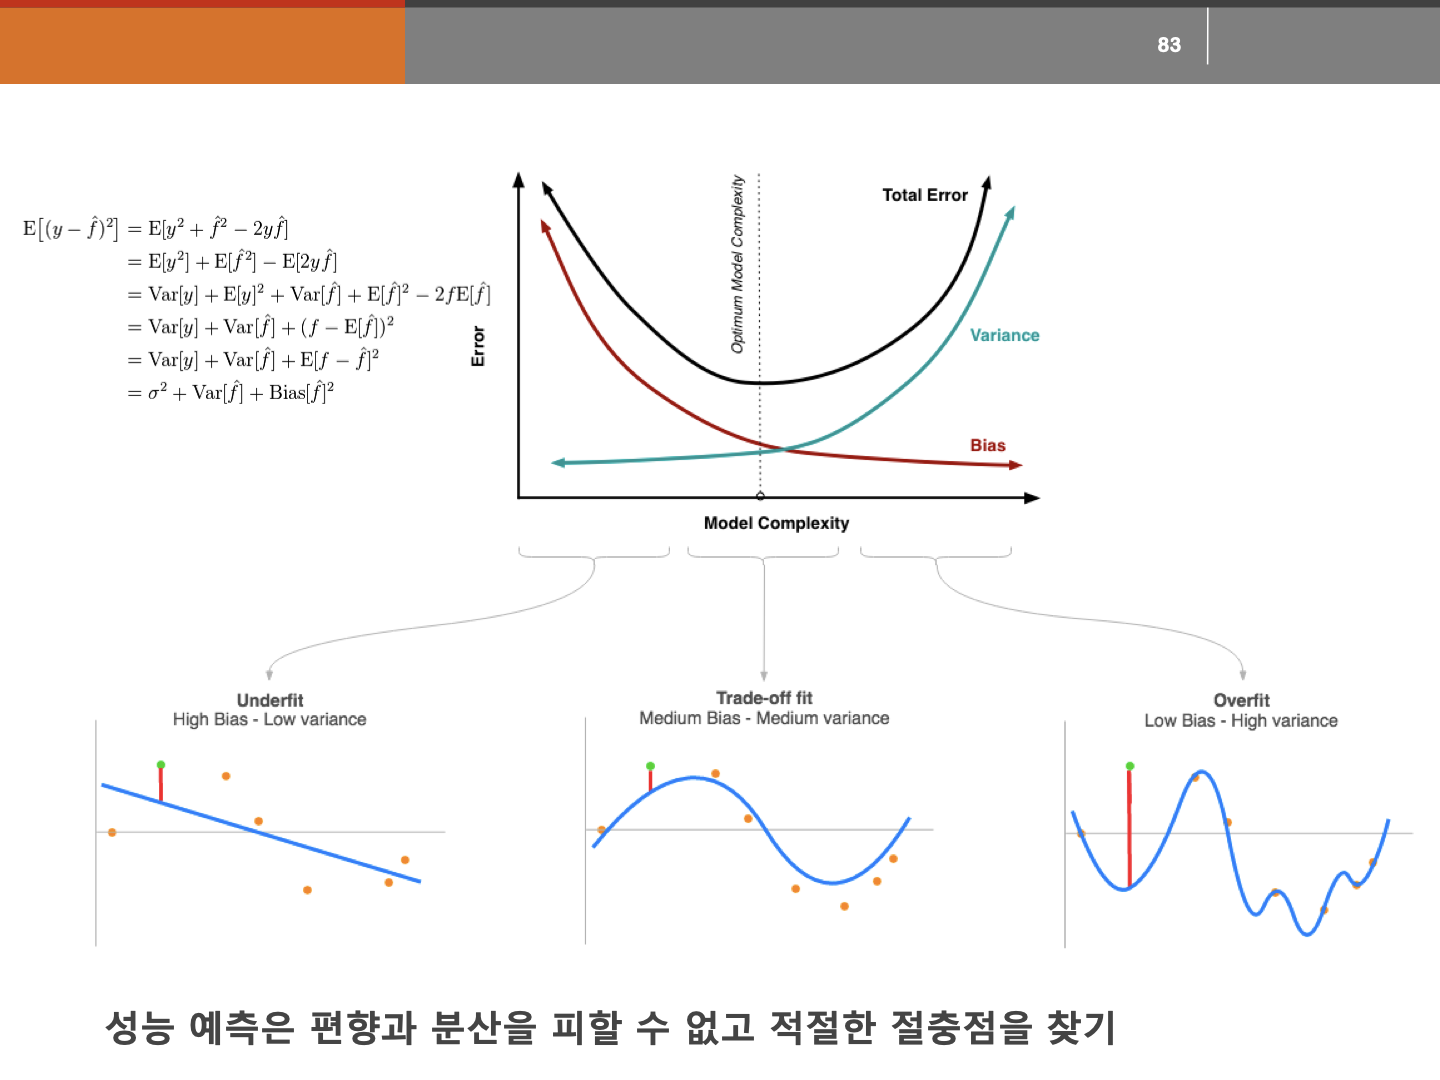

In [ ]:
# bias와 variance 는 같은 라인에 있기 떄문에, 이 두개가 상반된 trade-off 관계이기 떄문에, 이 두개의 합이 가장 작은 부분을 찾는 것이
# 수학적으로 최적의 모델을 찾는 것이라고 할 수 있음.

In [ ]:
# 모델의 복잡도가 높아질수록 bias 는 낮아짐.
# 그래프를 안그리면 전문가들은 의심함

In [ ]:
# bias 는 학습데이터로 확인
# variance 는 실제 검증데이터로 확인

In [ ]:
# learning curve 를 그려보자!
# 오버피팅 알 수 있고, 데이터가 필요한 양도 알 수 있음. 데이터의 개수가 x축이기 때문

In [27]:
!pip install -U sklearn-evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01


In [28]:
from sklearn.model_selection import learning_curve

In [ ]:
# 데이터에 따라서 어떻게 변하는가 (진행상황)
# 학습정도(epoch)에 따라서.

In [29]:
learning_curve(KNeighborsClassifier(), iris.iloc[:,:-1], iris.species)
# cv=None 이게 있으면 전체 데이터로 확인하자

(array([ 12,  39,  66,  93, 120]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.98924731, 0.96774194, 0.98924731, 0.97849462, 0.97849462],
        [0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667]]),
 array([[0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
        [0.96666667, 0.86666667, 0.86666667, 0.93333333, 0.9       ],
        [0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]]))

In [30]:
len(learning_curve(KNeighborsClassifier(), iris.iloc[:,:-1], iris.species))

3

In [31]:
train_size, train_score, test_score = learning_curve(KNeighborsClassifier(), iris.iloc[:,:-1], iris.species)

In [32]:
import sklearn_evaluation  # 설치는 - 사용은 _

In [33]:
dir(sklearn_evaluation)

['ClassifierEvaluator',
 'NotebookCollection',
 'NotebookDatabase',
 'NotebookIntrospector',
 'SQLiteTracker',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'compute',
 'evaluator',
 'metrics',
 'nb',
 'plot',
 'preprocessing',
 'report',
 'table',
 'telemetry',
 'tracker',
 'util',
 'validate']

In [35]:
sklearn_evaluation.plot.learning_curve # 설명이 똑바로 안나옴

<function sklearn_evaluation.plot.style.apply_theme.<locals>.decorator.<locals>.wrapper_func(*args, **kwargs)>

In [36]:
# 설명이 부족하면 보자!
import inspect

In [38]:
print(inspect.getsource(sklearn_evaluation.plot.learning_curve))  # decorater 씀

        def wrapper_func(*args, **kwargs):
            with tmp_theme(ax_style, cmap_style):
                return func(*args, **kwargs)



<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

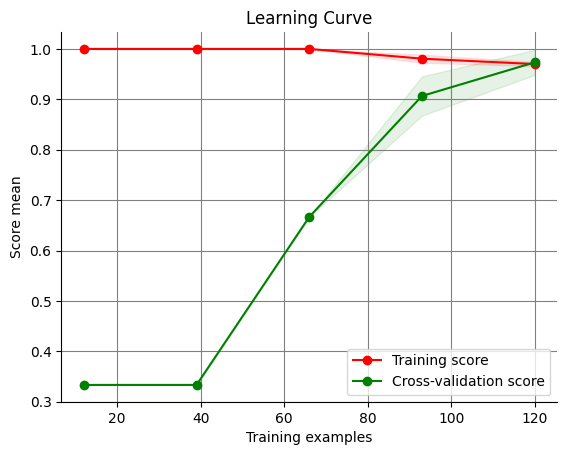

In [40]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

In [ ]:
# 위는 쓸만한 모델

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

In [43]:
train_size, train_score, test_score = learning_curve(LogisticRegression(), iris.iloc[:,:-1], iris.species)

/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

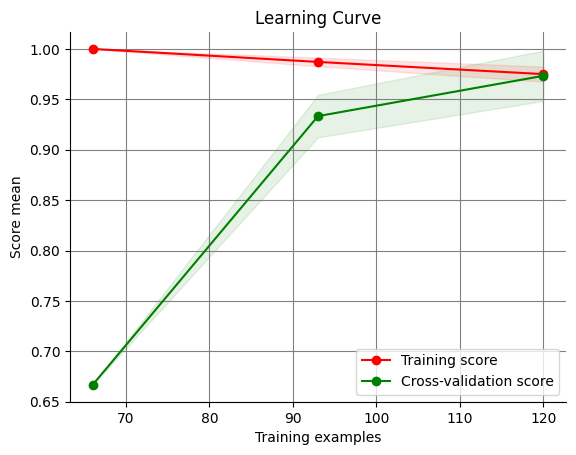

In [44]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

In [45]:
from sklearn.datasets import load_breast_cancer

In [46]:
data =  load_breast_cancer(as_frame=True)

In [47]:
breast = data.frame

In [49]:
train_size, train_score, test_score = learning_curve(LogisticRegression(), breast.iloc[:,:-1], breast.target)

/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

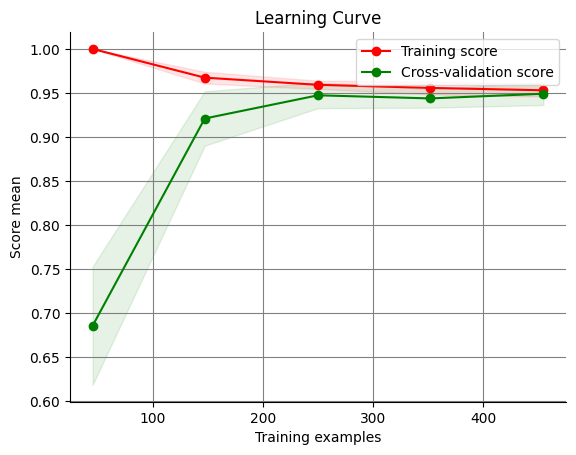

In [52]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

In [53]:
train_size, train_score, test_score = learning_curve(LogisticRegression(solver='newton-cg'), 
                                                     breast.iloc[:,:-1], breast.target, cv=10)

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

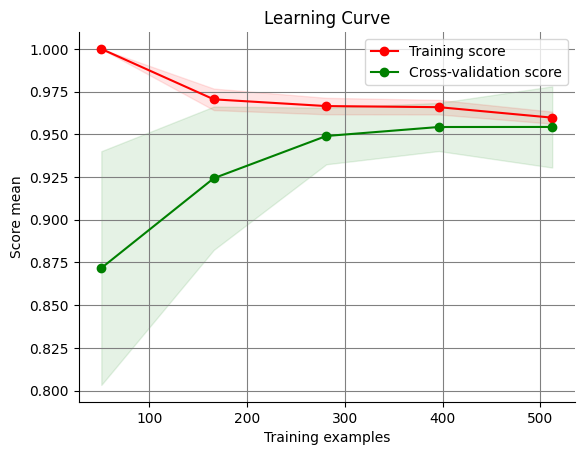

In [54]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)
# size 가 맨 끝에 들어감.

In [ ]:
# 초록색 영역은 cross validation 썼기 때문. 최대값 최소값 구역인 것.
# 알고리즘의 학습여부, 오버피팅 여부, 데이터 크기는 이 learning curve 로 한방에 알 수 있음.

In [55]:
import numpy as np

In [61]:
np.linspace(0.1,1.1,10, endpoint=False)  # 0을 포함하면 안되기 때문에 0.1

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [63]:
train_size, train_score, test_score = learning_curve(LogisticRegression(solver='newton-cg'), 
                                                     breast.iloc[:,:-1], breast.target, cv=10,
                                                    train_sizes=np.linspace(0.1,1.1,10, endpoint=False))

/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/baekkwanghyun/miniconda

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

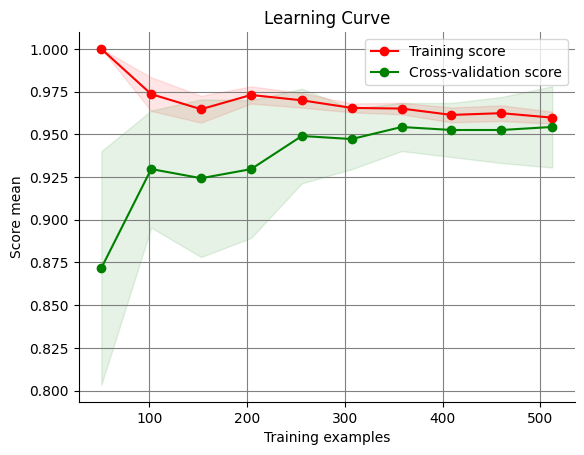

In [64]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

In [ ]:
# 위 처럼 데이터가 왔다갔다 하면 데이터가 작다는 뜻. 편차 때문에
# 데이터 부족이 크면 클수록 진폭이 커짐. 그러나 위는 납득할 정도임.

In [ ]:
# 하이퍼 파라미터 바꿀 때마다 러닝커브를 따로 그려야 함.
# 함수 만들어서 이거 나오도록 자동화 시켜놓음.
# 이것보다 더 멋진 자동화. sklearn 가장 큰 장점 중 하나인 Grid search

In [65]:
# Grid Search 나왔으니 넘파이 잠시 점검
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [66]:
i = np.array([1,1,3,8,5])

In [67]:
a[i] # fancy indexing 이것은 a[[1,1,3,8,5]]

array([ 1,  1,  9, 64, 25])

In [68]:
j = np.array([[3,4],[9,7]])  # fancy indexing 은 차원 유지.

In [69]:
a[j]

array([[ 9, 16],
       [81, 49]])

In [70]:
palette = np.array([[0, 0, 0],         # black
                    [255, 0, 0],       # red
                    [0, 255, 0],       # green
                    [0, 0, 255],       # blue
                    [255, 255, 255]])  # white

In [71]:
image = np.array([[0, 1, 2, 0],  # each value corresponds to a color in the palette
                  [0, 3, 4, 0]])

In [72]:
palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

In [73]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [80]:
i = np.array([[0, 1],  # indices for the first dim of `a`
              [1, 2]])
j = np.array([[2, 1],  # indices for the second dim
              [3, 3]])

In [75]:
x = np.array([[1,2,3],[4,5,6]])

In [76]:
x[(0,0),(1,2)]

array([2, 3])

In [77]:
a[i]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [81]:
a[j]  # 3 이 없어서 오류남. 지금 하는 거 다 fancy indexing

IndexError: index 3 is out of bounds for axis 0 with size 3

In [82]:
a[i, j]

array([[ 2,  5],
       [ 7, 11]])

In [83]:
# ix_ 가 grid 개념; 격자 간격 만드는 것
a = np.array([1,2,3])
b = np.array([4,5,6])

In [85]:
ax, bx = np.meshgrid(a,b)

In [86]:
ax

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [87]:
bx

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [88]:
ax + bx  # broadcasting 한 것

array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

In [91]:
axx, bxx = np.ogrid[1:4, 4:7]

In [92]:
axx

array([[1],
       [2],
       [3]])

In [93]:
bxx

array([[4, 5, 6]])

In [94]:
axx + bxx

array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

In [95]:
np.mgrid[1:4, 4:7]  # return 값 1개. meshgrid 랑 비슷함

array([[[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]],

       [[4, 5, 6],
        [4, 5, 6],
        [4, 5, 6]]])

In [96]:
np.ix_(a, b)
# 나중에 convolution 할 때 씀

(array([[1],
        [2],
        [3]]),
 array([[4, 5, 6]]))

In [97]:
from sklearn.model_selection import GridSearchCV # 이것도 cross validation 으로 함

In [98]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'uniform'}

In [100]:
grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':range(3,21,2)})
# Init signature:
# GridSearchCV(
#     estimator,
#     param_grid,  # 하이퍼 파라미터 바꾸는 것
#     *,
#     scoring=None,
#     n_jobs=None,
#     refit=True,
#     cv=None,
#     verbose=0,
#     pre_dispatch='2*n_jobs',
#     error_score=nan,
#     return_train_score=False,
# )

In [101]:
grid.fit(iris.iloc[:,:-1], iris.species)   # best_ 가 생김

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 21, 2)})

In [102]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [103]:
grid.best_index_

2

In [104]:
grid.best_params_

{'n_neighbors': 7}

In [105]:
grid.best_score_

0.9800000000000001

In [107]:
import pandas as pd

In [106]:
grid.cv_results_

{'mean_fit_time': array([0.0021461 , 0.00101948, 0.00104074, 0.00099688, 0.00090485,
        0.00085239, 0.00088696, 0.00077419, 0.00076861]),
 'std_fit_time': array([1.68142626e-03, 5.20449792e-05, 5.61744530e-05, 4.94577836e-05,
        3.90920397e-05, 8.90094695e-05, 1.18487404e-04, 3.36634876e-06,
        4.77647094e-06]),
 'mean_score_time': array([0.00300927, 0.00167403, 0.001825  , 0.00170827, 0.00152893,
        0.00151086, 0.00144324, 0.00133615, 0.00133305]),
 'std_score_time': array([1.93958003e-03, 6.14644022e-05, 5.58532046e-05, 8.14529432e-05,
        6.90020440e-05, 1.74924837e-04, 1.11646571e-04, 8.73198078e-06,
        1.76107267e-06]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15, 17, 19],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neig

In [109]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.002146,0.001019,0.001041,0.000997,0.000905,0.000852,0.000887,0.000774,0.000769
std_fit_time,0.001681,0.000052,0.000056,0.000049,0.000039,0.000089,0.000118,0.000003,0.000005
mean_score_time,0.003009,0.001674,0.001825,0.001708,0.001529,0.001511,0.001443,0.001336,0.001333
std_score_time,0.00194,0.000061,0.000056,0.000081,0.000069,0.000175,0.000112,0.000009,0.000002
param_n_neighbors,3,5,7,9,11,13,15,17,19
params,{'n_neighbors': 3},{'n_neighbors': 5},{'n_neighbors': 7},{'n_neighbors': 9},{'n_neighbors': 11},{'n_neighbors': 13},{'n_neighbors': 15},{'n_neighbors': 17},{'n_neighbors': 19}
split0_test_score,0.966667,0.966667,0.966667,0.966667,0.933333,0.933333,0.933333,0.933333,0.933333
split1_test_score,0.966667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
split2_test_score,0.933333,0.933333,0.966667,0.966667,1.0,0.966667,0.933333,0.933333,0.933333
split3_test_score,0.966667,0.966667,0.966667,0.933333,0.966667,0.966667,0.966667,0.966667,0.966667


<AxesSubplot: >

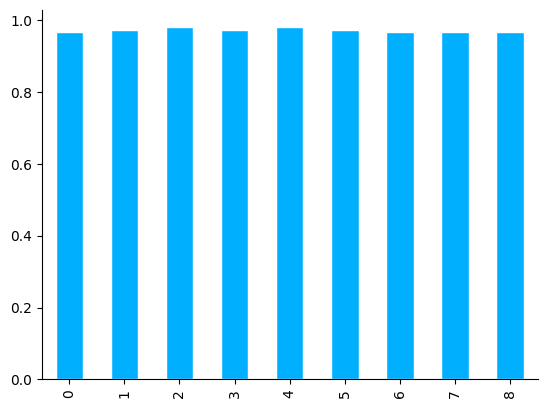

In [112]:
pd.DataFrame(grid.cv_results_)['mean_test_score'].plot.bar()

In [113]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'uniform'}

In [114]:
grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':range(3,21,2),
                                            'weights':['uniform', 'distance']})

In [115]:
grid.fit(iris.iloc[:,:-1], iris.species)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 21, 2),
                         'weights': ['uniform', 'distance']})

In [116]:
grid.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
# 데이터 전처리만 잘 해놓으면 알고리즘은 다 만들 수 있다는 것.
# 전처리가 80% 이다!!

In [117]:
# 평가 척도가 달라질 수도 있음
# 뷸균형 데이터 셋
# EDA 에서 y값 했던 것 기억.
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [119]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [121]:
np.unique(iris.species, return_counts=True)

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([50, 50, 50]))

In [122]:
np.histogram(iris.species)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# 평가척도가 달라지는 것이 데이터에 따라 달라짐.

In [123]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [124]:
# 불균형 데이터 셋이면 accuracy 만으로 비교가 안되서 다른 평가척도를 써야 함.
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 2.9 MB/s eta 0:00:00 MB/s eta 0:00:01


In [ ]:
# 데이터 1000개 vs 1개면 중복을 허락해서 비율을 맞춰줌
# 그것을 over sampling
# 반대로 작게 뽑으면 under sampling
# 이 두 가지가 가장 저질방식
# 이를 좀 더 우아하게 하는 것이 스모트 샘플링?

In [125]:
# 분석을 시작함과 동시에 y값 EDA 해야 함 => 비율 따져보는 것
import imblearn

In [126]:
dir(imblearn) # keras 있음. 딥러닝에도 쓸 것.
# 우리가 수집할 데이터들이 불균형할 경우가 매우 많을 것.
# 클래스 가중치도 사람이 정해주는 하이퍼 파라미터

['FunctionSampler',
 'LazyLoader',
 '__IMBLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'combine',
 'ensemble',
 'exceptions',
 'importlib',
 'keras',
 'metrics',
 'over_sampling',
 'pipeline',
 'show_versions',
 'sys',
 'tensorflow',
 'types',
 'under_sampling',
 'utils']

In [ ]:
# 나중에 프로젝트 할 때 불균형 데이터가 매우 많이 생김
# 이때 우리가 직접 데이터를 만드는 데이터 어노테이션, 데이터 라벨러

In [ ]:
# 오버 샘플링

In [127]:
from imblearn.over_sampling import RandomOverSampler

In [128]:
rov = RandomOverSampler()

In [129]:
rov.fit_resample(iris.iloc[:,:-1], iris.species)

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

In [130]:
# len 테크닉
re_X, re_y = rov.fit_resample(iris.iloc[:,:-1], iris.species)

In [131]:
re_X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [132]:
re_y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
# 이건 불균형 데이터셋이 아님. iris

In [133]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [134]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [135]:
re_X, re_y = rov.fit_resample(df.iloc[:,:-1], df.Class)

In [ ]:
# 1을 더 뽑은 것.

In [136]:
re_y.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
# 불균형 데이터셋을 해결한 것. 그러면 모델 만들기 정말 좋음. 그러나 이 때 accuracy 만 보면 안됨.

In [138]:
from sklearn.dummy import DummyClassifier

In [ ]:
ss = DummyClassifier()
# Init signature: DummyClassifier(*, strategy='prior', random_state=None, constant=None)

# strategy : {"most_frequent", "prior", "stratified", "uniform", "constant"}, default="prior"
ss.fit()

# 이런 더미 애들이 잘 맞추면 데이터 셋이 특수한 경우임을 알 수 있음.
# 숫자가 너무 크면 로그를 씌우는 방법도 있음.

In [141]:
# 오버 샘플링 하면 중복데이터 위험 매우 많음
re_X[re_X.duplicated(keep=False)]
# 1을 더 많이 뽑았으니까 중복될 수밖에 없음.
# 이제 제일 영향력 없는 애들을 수정해버림.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,34256.0,0.539276,1.554890,-2.066180,3.241617,0.184736,0.028330,-1.515521,0.537035,-1.999846,...,0.302735,0.371773,0.111955,-0.305225,-1.053835,0.771175,0.240878,0.418435,0.232170,19.02
568626,8614.0,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,-1.305279,...,0.500779,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,1.00
568627,41397.0,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,9.643419,-7.701499,...,-1.614660,2.714045,-0.101355,-0.439666,0.519514,0.789328,0.064357,-1.621386,-1.104819,273.01
568628,135102.0,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,...,0.150727,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,108.51


In [ ]:
# 이제 성능 체크하는 법.
# 지금껏 score => accuracy 만 했음
# metric
# compustion metric => 혼동행렬
# 성능평가의 첫 시작은 혼동행렬

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.species)

In [144]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [145]:
confusion_matrix(y_test, knn.predict(X_test))
# 실제값 y_test, 예측값; X_test 넣었을때 모델이 예측하는 것
# Signature:
# confusion_matrix(
#     y_true,
#     y_pred,
#     *,
#     labels=None,
#     sample_weight=None,
#     normalize=None,
# )

# 대각선은 맞춘 것.
# 이렇게 표를 그려 놓으면 뭐가 맞고 뭐가 틀렸는가 한눈에 보임. 이를 혼동행렬이라고 함.
# 로우가 실제, 컬럼이 예측 => 프레임워크마다 또 다름
# 성능평가의 시작은 여기서부터!

array([[11,  0,  0],
       [ 0, 10,  2],
       [ 0,  0, 15]])

In [ ]:
# 이를 기반으로 precision, recall, sensitivity, auc, roc curve 등 배움

In [ ]:
# 다시 그리드 서치로 돌아가서 scoring 을 다양하게 성능평가 하도록 할 것.

In [ ]:
grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':range(3,21,2)})
# Init signature:
# GridSearchCV(
#     estimator,
#     param_grid,  # 하이퍼 파라미터 바꾸는 것
#     *,
#     scoring=None,
#     n_jobs=None,
#     refit=True,
#     cv=None,
#     verbose=0,
#     pre_dispatch='2*n_jobs',
#     error_score=nan,
#     return_train_score=False,
# )